<a href="https://colab.research.google.com/github/sphuang28/Tibaml_11103_AI/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''



深度學習:模仿神經網路 --> 從人的角度思考 數學驗證輔助

接收端-->感知器-->輸出端
     (激活)
X1W1-->分類器(Perceptron)-->輸出


sigmoid函數
sigmoid=1(1+e*-x) 

使用多層感知器-->需要激活函示-->才不會變一層

每層接收端中間一定要使用激活函式(轉換)


==== Multi-Layer Perception(多層感知器)

深度學習 三步驟

1.係數全部隨機

2.定義損失函式(lose) lose(損失值)越小越好
  調整係數 --> 目的越接近答案

3.調整每一個參數:lose(損失值)越小越好


重點:
1.梯度下降:
  a.模型參數皆為隨機
  b.確定輸入/輸出正確性-->loss函式
  c.調整參數讓loss最小化

2.梯度下降時-->梯度消失(必定發生)-->緩解梯度消失
  a.激活函式選擇-->中間層:rela-->m=0/m=1
          -->輸出層:sigmoid(看需求)


補充:
1.深度學習沒有分群-->一定要有答案
2.資料量一定要多


激活函式選擇
中間 --> relu

輸出 --> sigmoid: 不互斥,獨立
   --> softmax: 互斥,不獨立

bias : 統一規格(0點激活)

一個激活函式一定要配一個bias


Cross Entopy:適合loss

loss特性 會有最小值

CE:
1.loss要件滿足
2.誤差大斜率(m)大

'''

In [ ]:
# tensorflow 2 -> tensorflow + keras
# tensorflow 2 -> 不須特別安裝gpu版, 只要你安裝好cuda+cudnn, 自動判定
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


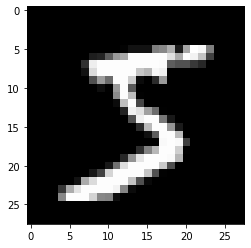

In [ ]:
# 只要看到matplotlib有cmap參數
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 如果你要反過來, _r PiYG->PiYG_r
import pandas as pd
import matplotlib.pyplot as plt
idx = 0
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [ ]:
# tensorflow模型
# 1. 地基(model): Sequential(一層疊一層), Model(自由)
# 2. 層(layer): Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")    
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


0.7000000000000001 0.8812908992306925


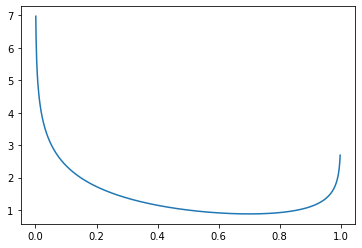

In [ ]:
import matplotlib.pyplot as plt
import math

p1 = 0.7
p2 = 1 - p1

xs = []
ys = []
intervals = 0.001

minp, minv = None, float("inf")
for i in range(998):
    q1 = (i + 1) * intervals
    q2 = 1 - q1
    xs.append(q1)
    ans = p1 * math.log(1/q1, 2) + p2 * math.log(1/q2, 2)
    ys.append(ans)
    if ans < minv:
        minp, minv = q1, ans
print(minp, minv)
plt.plot(xs, ys)

0.998 0.30080000000000007


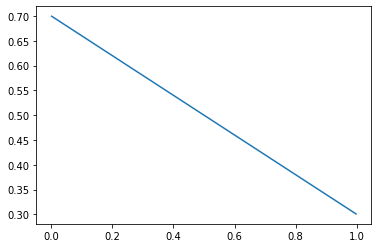

In [ ]:
p1 = 0.7
p2 = 1 - p1

xs = []
ys = []
intervals = 0.001

minp, minv = None, float("inf")
for i in range(998):
    q1 = (i + 1) * intervals
    q2 = 1 - q1
    xs.append(q1)
    ans = p1 * (1 - q1) + p2 * (1 - q2)
    ys.append(ans)
    if ans < minv:
        minp, minv = q1, ans
print(minp, minv)
plt.plot(xs, ys)

In [ ]:
# 如果你最後輸出是
# 1個神經元: BinaryCrossEntropy plog(1/q) + (1-p)log(1/1-q)
# 多個神經元: CategoricalCrossEntropy  pilog(1/qi)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:
# y: one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# x: 攤平(28*28->784), Scaling to 0-1(配合tensorflow)
# reshape: 你可以某個位置設置-1, 讓他自己去算
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0

In [ ]:
import numpy as np
n = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])
n.reshape(-1, 3)

In [ ]:
# batch_size: 我看多少筆, 把所有筆的斜率做一個平均, 再調整
# 圖片小(不吃那麼多ram):100-200 圖片大(吃很多ram):10-20
# 60000筆, 200比一次調整  -> 300次調整
# epochs: 整份資料看幾遍(你覺得模型訓練好就停下來)
# validation_split: 切出一部份資料來做模型確認
# epochs + validation: 什麼時候停下來(val_loss平滑的時候就停下來)
# epoch: 60000筆(90%) -> 54000 / 200 -> 270調整
# verbose: 決定log印多少 1(default):進度條 2:沒有進度條, 0:完全不印
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
270/270 - 2s - loss: 0.9051 - accuracy: 0.8102 - val_loss: 0.3182 - val_accuracy: 0.9272 - 2s/epoch - 6ms/step
Epoch 2/50
270/270 - 1s - loss: 0.3000 - accuracy: 0.9232 - val_loss: 0.2108 - val_accuracy: 0.9453 - 1s/epoch - 4ms/step
Epoch 3/50
270/270 - 1s - loss: 0.2282 - accuracy: 0.9376 - val_loss: 0.1756 - val_accuracy: 0.9542 - 1s/epoch - 4ms/step
Epoch 4/50
270/270 - 1s - loss: 0.1915 - accuracy: 0.9469 - val_loss: 0.1513 - val_accuracy: 0.9588 - 1s/epoch - 4ms/step
Epoch 5/50
270/270 - 1s - loss: 0.1661 - accuracy: 0.9531 - val_loss: 0.1356 - val_accuracy: 0.9645 - 1s/epoch - 4ms/step
Epoch 6/50
270/270 - 1s - loss: 0.1459 - accuracy: 0.9585 - val_loss: 0.1233 - val_accuracy: 0.9678 - 1s/epoch - 4ms/step
Epoch 7/50
270/270 - 1s - loss: 0.1286 - accuracy: 0.9635 - val_loss: 0.1114 - val_accuracy: 0.9695 - 1s/epoch - 4ms/step
Epoch 8/50
270/270 - 1s - loss: 0.1142 - accuracy: 0.9676 - val_loss: 0.1028 - val_accuracy: 0.9718 - 1s/epoch - 4ms/step
Epoch 9/50
270/270 - 1s 

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9765


[0.07431861758232117, 0.9764999747276306]

In [ ]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# demo argmax
# 不帶參數: 變成一個list, 把最大值的位置拿出來
n = np.array([
    [1, 4],
    [2, 3],
    [5, 0]
])
n.argmax()
n.argmax(axis=0)
# !!!我們用這個, axis=-1也可以
n.argmax(axis=1)

NameError: ignored

In [ ]:
# demo nonzero
# 第一個非0位置再(0, 2)
# 第二個非0位置再(1, 1)
n = np.array([
    [0, 0, 1],
    [0, 2, 0]
])
# (所有非0位置的第一個座標, 所有非0位置的第二個座標)
np.nonzero(n)

NameError: ignored

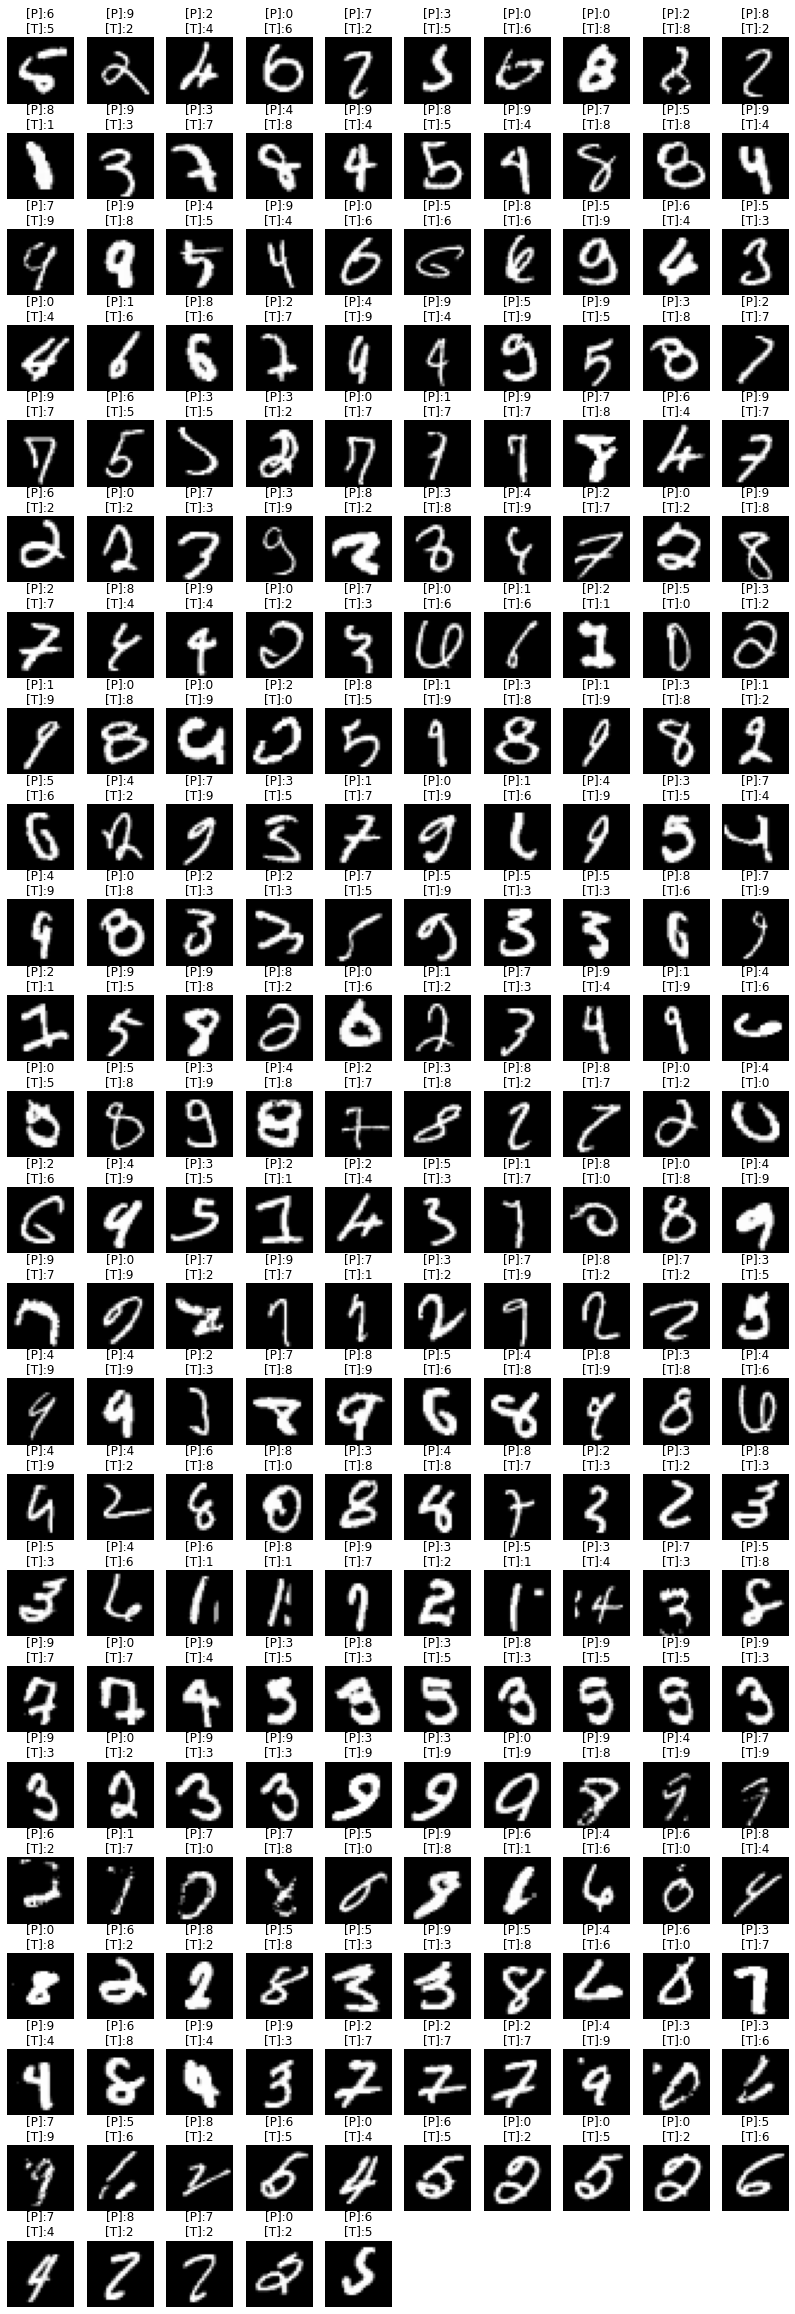

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_img = x_test[idx]
false_true = y_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[T]:{}".format(false_pre[i], false_true[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i], cmap="gray")